<a href="https://colab.research.google.com/github/rodrigoyujisato/alura-data-science-maio-2022/blob/main/alura_data_science_maio_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula 1**

In [1]:
import pandas as pd
file = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(file)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
data.sample(12)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2862,NaN,Vila Morumbi,São Paulo,736,4,8,14,R$ 20.000\n /Mês
3077,"Avenida Professor Fonseca Rodrigues, 706",Alto de Pinheiros,São Paulo,500,4,5,4,R$ 6.863.720
3524,NaN,Vila Inah,São Paulo,432,4,6,6,R$ 20.500\n /Mês
7313,Rua Sacadura Cabral,Lapa,São Paulo,37,1,2,1,R$ 510.000
8058,Rua Senador Otávio Mangabeira,Jardim Morumbi,São Paulo,355,5,6,5,R$ 2.000.000
3935,Rua Angatuba,Pacaembu,São Paulo,687,5,6,4,R$ 10.000.000
6019,Praça Delgado Arouche,Alto da Mooca,São Paulo,130,3,2,2,R$ 750.000
1587,NaN,Vila Matilde,São Paulo,320,3,3,6,R$ 1.200.000
792,Rua Silveira Sampaio,Fazenda Morumbi,São Paulo,1005,5,4,4,R$ 35.000\n /Mês
942,"Rua Francisco Assis Garrido, 130",Jardim São Luís,São Paulo,170,4,2,6,R$ 730.000


In [3]:
data["Bairro"][6522]

'Vila Paulo Silas'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [5]:
data["Metragem"].mean()

442.30065947242207

In [6]:
sum(data["Bairro"] == "Vila Mariana" * 1)

184

In [7]:
true_vila_mariana = ( data["Bairro"] == "Vila Mariana" )

In [8]:
imoveis_vila_mariana = data[true_vila_mariana]

In [9]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [10]:
data["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

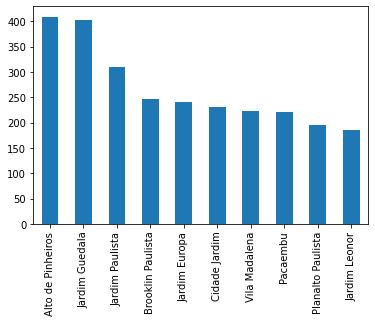

In [11]:
n_imoveis_bairro = data["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

Desafios

1.   Média da metragem dos imóveis por bairro
2.   Duas formas de selecionar os dados por bairro
3.   Explorar algns gráficos na documentação, aplicar nas demais colunas do dataframe e incluir conclusões
4.   Pegar outras estatístias dos dados: média, mediana, minimo, máximo e incluir conclusões
5.   Quais os bairros com maior incidência de NaN



In [12]:
data["Bairro"].value_counts().mean()


14.25962910128388

In [13]:
media_groupby = data.groupby('Bairro').median() # groupby method
media_groupby.head(10) # first 10 cases

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,227.5,3.0,3.0,3.0
Alto da Boa Vista,378.0,4.0,5.5,4.0
Alto da Lapa,255.0,3.0,4.0,4.0
Alto da Mooca,182.5,3.0,2.0,4.0
Alto de Pinheiros,412.0,4.0,5.0,4.0
Aricanduva,278.0,3.0,3.0,2.0
Balneário Mar Paulista,250.0,4.0,4.0,10.0
Barra Funda,122.5,3.0,2.0,1.0
Barro Branco (Zona Norte),600.0,3.0,4.0,4.0


**Aula 2** - Tratamento e dados e primeiros gráficos

In [15]:
data.info() # get data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [18]:
data["Valor"][0] # get 1st value "valor" 

'R$ 7.000.000'

In [19]:
data["Valor"][0].split() # split value

['R$', '7.000.000']

In [21]:
data["Valor"].str.split() # inform string as parameter

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [22]:
data["Valor"].str.split(expand = True) # plot as dataframe

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [25]:
data["Valor"].str.split(expand = True)[0].unique() # get unique value for column 0

array(['R$'], dtype=object)